форма массива X: (26, 2)


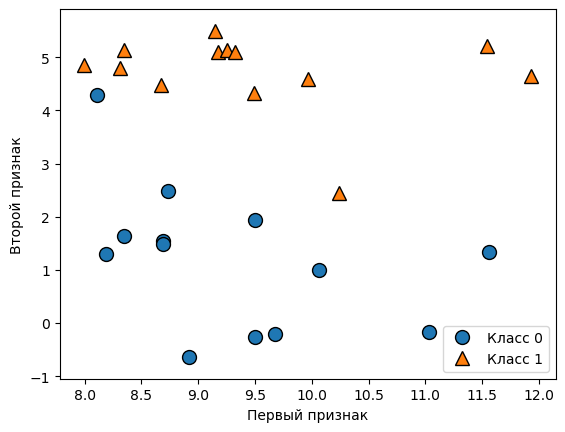

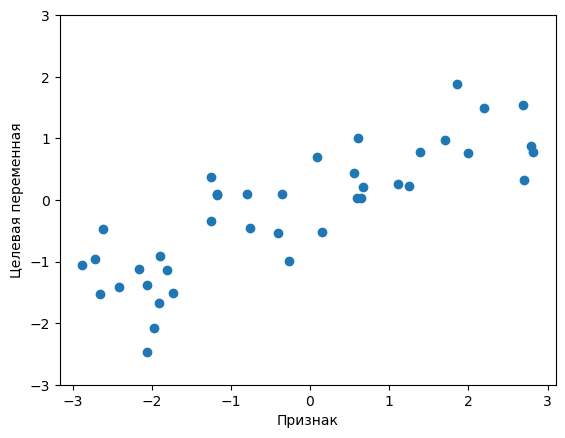

Ключи cancer(): 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
Форма массива data для набора cancer: (569, 30)
Количество примеров для каждого класса:
{'malignant': 212, 'benign': 357}
форма массива X: (506, 104)


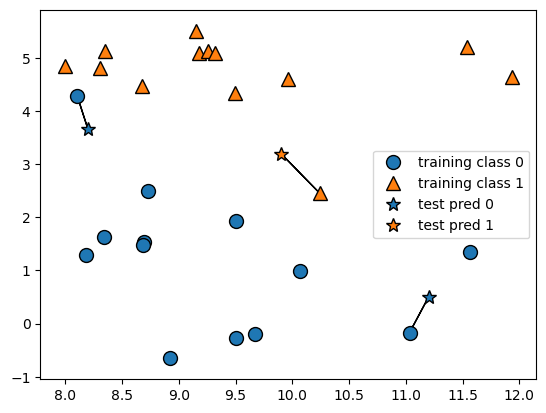

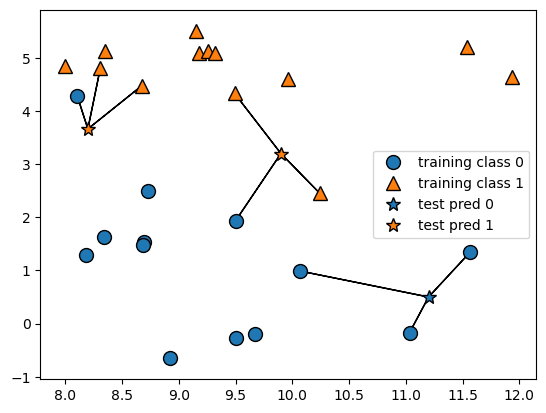

Прогнозы на тестовом наборе: [1 0 1 0 1 0 0]
Правильность на тестовом наборе: 0.86


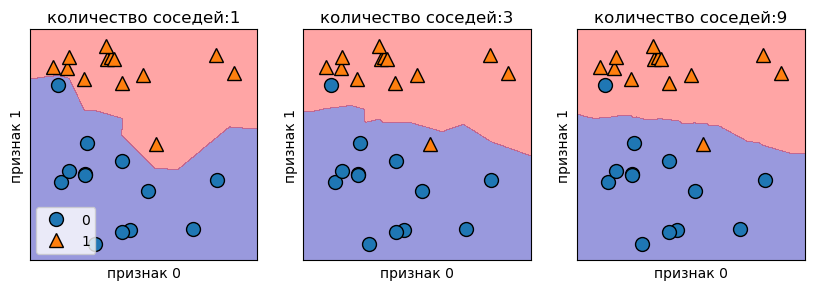

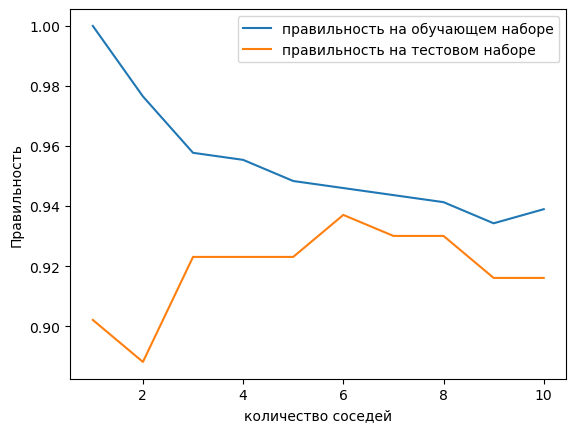

Матрица ошибок для 1 соседей:
[[47  6]
 [ 8 82]]

Матрица ошибок для 2 соседей:
[[48  5]
 [11 79]]

Матрица ошибок для 3 соседей:
[[47  6]
 [ 5 85]]

Матрица ошибок для 4 соседей:
[[48  5]
 [ 6 84]]

Матрица ошибок для 5 соседей:
[[46  7]
 [ 4 86]]

Матрица ошибок для 6 соседей:
[[48  5]
 [ 4 86]]

Матрица ошибок для 7 соседей:
[[47  6]
 [ 4 86]]

Матрица ошибок для 8 соседей:
[[47  6]
 [ 4 86]]

Матрица ошибок для 9 соседей:
[[45  8]
 [ 4 86]]

Матрица ошибок для 10 соседей:
[[45  8]
 [ 4 86]]

Глубина дерева: 1
Матрица ошибок:
[[45  8]
 [ 3 87]]
----------------------------------------
Глубина дерева: 2
Матрица ошибок:
[[50  3]
 [10 80]]
----------------------------------------
Глубина дерева: 3
Матрица ошибок:
[[48  5]
 [ 3 87]]
----------------------------------------
Глубина дерева: 4
Матрица ошибок:
[[49  4]
 [ 3 87]]
----------------------------------------
Глубина дерева: 5
Матрица ошибок:
[[49  4]
 [ 3 87]]
----------------------------------------
Глубина дерева: 6
Матрица оши

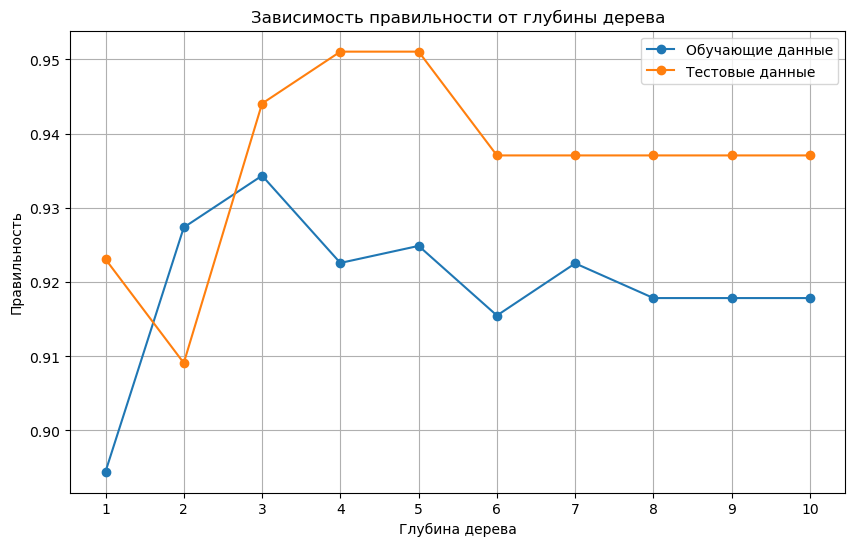


Наилучшая правильность на кросс-валидации: 0.934
Правильность на тестовом наборе с наилучшим параметром: 0.944


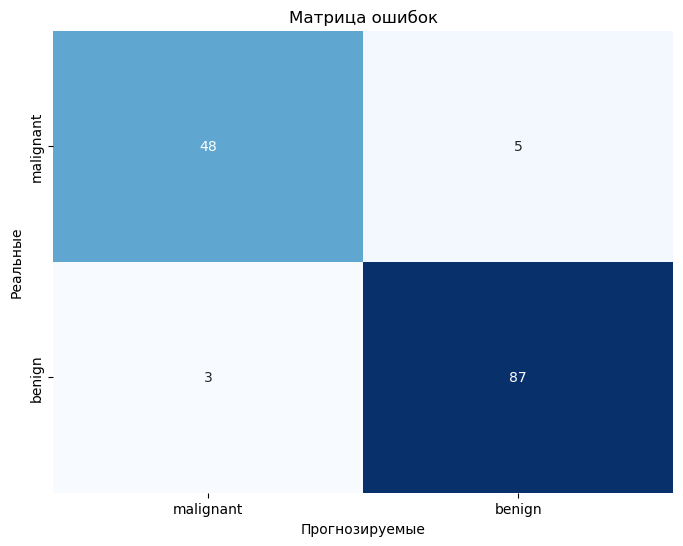

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix

# Создание данных и визуализация
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Класс 0", "Класс 1"], loc=4)
plt.xlabel("Первый признак")
plt.ylabel("Второй признак")
print("форма массива X: {}".format(X.shape))
plt.show()

X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Признак")
plt.ylabel("Целевая переменная")
plt.show()

# Загрузка и анализ набора данных breast cancer
cancer = load_breast_cancer()
print("Ключи cancer(): \n{}".format(cancer.keys()))

print("Форма массива data для набора cancer: {}".format(cancer.data.shape))

print("Количество примеров для каждого класса:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

X, y = mglearn.datasets.load_extended_boston()
print("форма массива X: {}".format(X.shape))

# Визуализация классификации k-NN
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

mglearn.plots.plot_knn_classification(n_neighbors=3)
plt.show()

# Классификация k-NN на наборе данных forge
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
print("Прогнозы на тестовом наборе: {}".format(clf.predict(X_test)))
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(X_test, y_test)))

# Визуализация разделения для различных значений n_neighbors
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("количество соседей:{}".format(n_neighbors))
    ax.set_xlabel("признак 0")
    ax.set_ylabel("признак 1")
axes[0].legend(loc=3)
plt.show()

# Классификация рака груди с использованием k-NN
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
conf_matrices = []  # Матрицы ошибок для каждой модели

neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
    # Рассчитываем матрицу ошибок для текущей модели
    y_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)

# Визуализация производительности моделей
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()
plt.show()

# Вывод матриц ошибок для каждой модели
for n_neighbors, conf_matrix in zip(neighbors_settings, conf_matrices):
    print(f"Матрица ошибок для {n_neighbors} соседей:\n{conf_matrix}\n")

# ------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

train_scores = []
test_scores = []

for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    train_score = cross_val_score(tree, X_train, y_train, cv=5)
    train_scores.append(np.mean(train_score))
    tree.fit(X_train, y_train)
    test_scores.append(tree.score(X_test, y_test))
    y_pred = tree.predict(X_test)
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Глубина дерева: {depth}")
    print("Матрица ошибок:")
    print(confusion)
    print("-" * 40)
    
    

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), train_scores, label="Обучающие данные", marker='o')
plt.plot(range(1, 11), test_scores, label="Тестовые данные", marker='o')
plt.xlabel("Глубина дерева")
plt.ylabel("Правильность")
plt.xticks(range(1, 11))
plt.legend()
plt.title("Зависимость правильности от глубины дерева")
plt.grid(True)
plt.show()

best_score = 0
best_depth = None
for depth in range(1, 11):
    tree = DecisionTreeClassifier(max_depth=depth, random_state=0)
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_depth = depth

tree = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
tree.fit(X_train, y_train)

test_score = tree.score(X_test, y_test)
print(f"\nНаилучшая правильность на кросс-валидации: {best_score:.3f}")
print(f"Правильность на тестовом наборе с наилучшим параметром: {test_score:.3f}")

y_pred = tree.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel("Прогнозируемые")
plt.ylabel("Реальные")
plt.title("Матрица ошибок")
plt.show()
